In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import regex as re

In [20]:
df = pd.read_csv("Data/combined.csv")
df

,Unnamed: 0,Category,Answer
0,0,Thing,GALE WINDS
1,1,Phrase,A CHEAP SHOT
2,2,Phrase,A GREAT BUY
3,3,Phrase,A KODAK MOMENT
4,4,Event,A LONG HOT SHOWER
...,...,...,...
3247,3251,Living Thing,GREAT DANE
3248,3252,Event,SURPRISE PARTY
3249,3253,Event,GARAGE SALE
3250,3254,In The Kitchen,TOASTER OVEN


In [21]:
# counts the letters of a word as a dictionary
def count_letters(word):
    count = {}
    for letter in word:
        count[letter] = count.get(letter, 0) + 1
    return count

In [22]:
df['Letter_Count'] = df['Answer'].apply(count_letters)
df

,Unnamed: 0,Category,Answer,Letter_Count
0,0,Thing,GALE WINDS,"{'G': 1, 'A': 1, 'L': 1, 'E': 1, ' ': 1, 'W': ..."
1,1,Phrase,A CHEAP SHOT,"{'A': 2, ' ': 2, 'C': 1, 'H': 2, 'E': 1, 'P': ..."
2,2,Phrase,A GREAT BUY,"{'A': 2, ' ': 2, 'G': 1, 'R': 1, 'E': 1, 'T': ..."
3,3,Phrase,A KODAK MOMENT,"{'A': 2, ' ': 2, 'K': 2, 'O': 2, 'D': 1, 'M': ..."
4,4,Event,A LONG HOT SHOWER,"{'A': 1, ' ': 3, 'L': 1, 'O': 3, 'N': 1, 'G': ..."
...,...,...,...,...
3247,3251,Living Thing,GREAT DANE,"{'G': 1, 'R': 1, 'E': 2, 'A': 2, 'T': 1, ' ': ..."
3248,3252,Event,SURPRISE PARTY,"{'S': 2, 'U': 1, 'R': 3, 'P': 2, 'I': 1, 'E': ..."
3249,3253,Event,GARAGE SALE,"{'G': 2, 'A': 3, 'R': 1, 'E': 2, ' ': 1, 'S': ..."
3250,3254,In The Kitchen,TOASTER OVEN,"{'T': 2, 'O': 2, 'A': 1, 'S': 1, 'E': 2, 'R': ..."


In [23]:
total_letter_count = {}
for letter_count in df["Letter_Count"]:
    for letter, count in letter_count.items():
        total_letter_count[letter] = total_letter_count.get(letter, 0) + count

total_letter_df = pd.DataFrame(total_letter_count.items(), columns=['Letter', 'Total_Count'])
total_letter_df.head()

,Letter,Total_Count
0,G,1183
1,A,3435
2,L,1786
3,E,3742
4,,3339


In [24]:
total_letter_df = total_letter_df.sort_values("Total_Count", ascending=False)
only_letters_count_df = total_letter_df[total_letter_df['Letter'].str.contains('[A-Z]')]
only_letters_frequency_df = only_letters_count_df.assign(Wheel_Frequency = 100 * only_letters_count_df['Total_Count']/only_letters_count_df['Total_Count'].sum()).drop('Total_Count', axis=1)
only_letters_frequency_df

,Letter,Wheel_Frequency
3,E,10.012844
1,A,9.191373
13,O,7.521674
6,I,7.120304
15,R,6.772450
7,N,6.247993
9,S,6.218559
14,T,6.090121
2,L,4.778979
10,C,4.498020


In [25]:
# pd.read_html('https://web.archive.org/web/20210304152631/http://en.algoritmy.net/article/40379/Letter-frequency-English')[1].to_csv('Data/English_Letter_Frequency.csv', index=False)

english_letter_frequency = pd.read_csv("Data/english_letter_frequency.csv")
english_letter_frequency = english_letter_frequency.assign(English_Frequency=english_letter_frequency['Frequency (%)'].apply(lambda x: float(x[:-1]))).drop('Frequency (%)', axis=1)
english_letter_frequency.head()

,Letter,English_Frequency
0,A,8.167
1,B,1.492
2,C,2.782
3,D,4.253
4,E,12.702


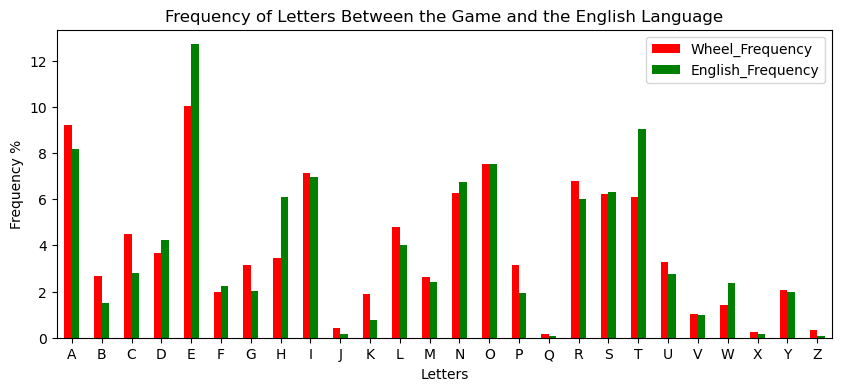

In [26]:
frequency_df = only_letters_frequency_df.merge(english_letter_frequency, on='Letter').sort_values('Letter')
frequency_df.plot(kind='bar', x='Letter', figsize=(10, 4), color=['red', 'green'])

plt.xticks(rotation=0)
plt.xlabel('Letters')
plt.ylabel('Frequency %')
plt.title('Frequency of Letters Between the Game and the English Language')

plt.savefig('assets/English_letter_frequency.png', bbox_inches='tight')
plt.show()

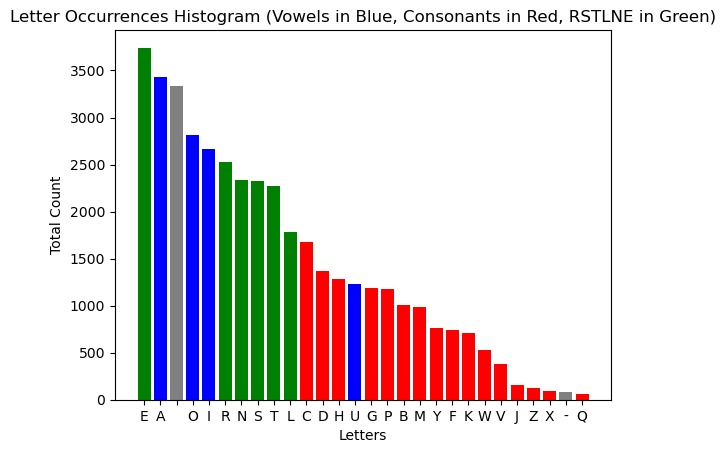

In [27]:

# Assuming you have the 'total_letter_df' DataFrame from your previous code

# Extract the letters and their corresponding counts
letters = total_letter_df['Letter'][:28]
counts = total_letter_df['Total_Count'][:28]

# Define a function to set colors based on whether the letter is a vowel or consonant
def set_color(letter):
    if re.match(r'[^A-Z]', letter):
        return 'gray'
    if re.match(r'[RSTLNE]', letter):
        return 'green'
    if re.match(r'[AEIOU]', letter):
        return 'blue'  # Set color for vowels to blue
    else:
        return 'red'   # Set color for consonants to red

# Create a list of colors based on the letters
colors = [set_color(letter) for letter in letters]

# Create a bar plot (histogram) with different colors for vowels and consonants
plt.bar(letters, counts, color=colors)

# Label the axes and set a title
plt.xlabel('Letters')
plt.ylabel('Total Count')
plt.title('Letter Occurrences Histogram (Vowels in Blue, Consonants in Red, RSTLNE in Green)')

# Show the plot
plt.show()

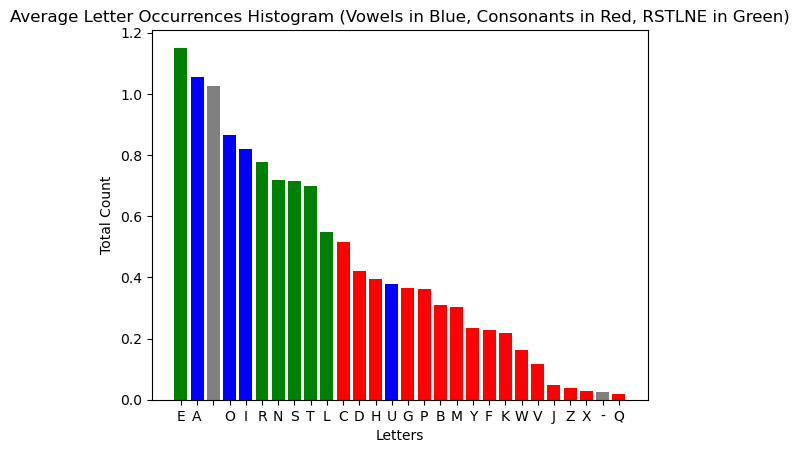

In [28]:
plt.bar(letters, counts/3252, color=colors)

# Label the axes and set a title
plt.xlabel('Letters')
plt.ylabel('Total Count')
plt.title('Average Letter Occurrences Histogram (Vowels in Blue, Consonants in Red, RSTLNE in Green)')

plt.savefig('assets/letter_occurrences_histogram.png', bbox_inches='tight')

# Show the plot
plt.show()

# That was the total occurances of letters. Now lets see the presence of a letter in a given word

In [29]:
def count_presence(word):
    letters_present = set()
    for letter in word:
        letters_present.add(letter)
    return letters_present

In [30]:
df['Letters_Present'] = df['Answer'].apply(count_presence)
df.head()

,Unnamed: 0,Category,Answer,Letter_Count,Letters_Present
0,0,Thing,GALE WINDS,"{'G': 1, 'A': 1, 'L': 1, 'E': 1, ' ': 1, 'W': ...","{L, I, W, , D, N, S, A, G, E}"
1,1,Phrase,A CHEAP SHOT,"{'A': 2, ' ': 2, 'C': 1, 'H': 2, 'E': 1, 'P': ...","{O, C, T, P, , H, S, A, E}"
2,2,Phrase,A GREAT BUY,"{'A': 2, ' ': 2, 'G': 1, 'R': 1, 'E': 1, 'T': ...","{Y, T, B, U, , A, G, R, E}"
3,3,Phrase,A KODAK MOMENT,"{'A': 2, ' ': 2, 'K': 2, 'O': 2, 'D': 1, 'M': ...","{O, T, K, M, , D, N, A, E}"
4,4,Event,A LONG HOT SHOWER,"{'A': 1, ' ': 3, 'L': 1, 'O': 3, 'N': 1, 'G': ...","{L, O, T, W, , H, N, S, A, G, R, E}"


In [31]:
total_letter_presence = {}
for letters_present in df["Letters_Present"]:
    for letter in letters_present:
        total_letter_presence[letter] = total_letter_presence.get(letter, 0) + 1

total_presence_df = pd.DataFrame(total_letter_presence.items(), columns=['Letter', 'Total_Presence'])
total_presence_df.head()

,Letter,Total_Presence
0,L,1363
1,I,1897
2,W,491
3,,2740
4,D,1139


In [32]:
new_total_presence_df = total_presence_df.sort_values("Total_Presence", ascending=False)
new_total_presence_df

,Letter,Total_Presence
3,,2740
9,E,2299
7,A,2242
10,O,1906
1,I,1897
18,R,1880
6,S,1737
5,N,1726
12,T,1678
0,L,1363


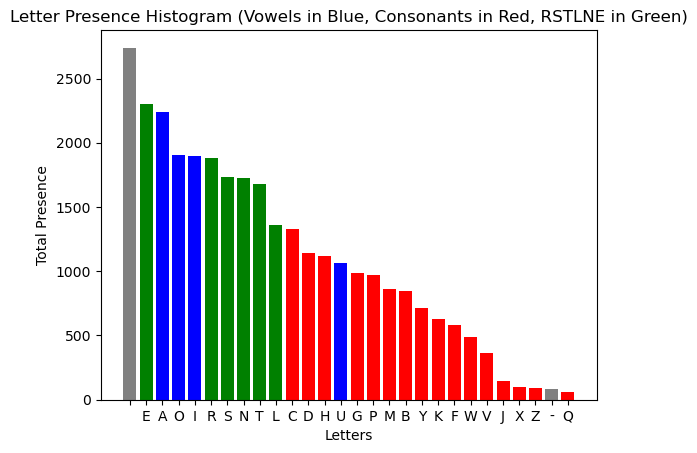

In [33]:
# Extract the letters and their corresponding counts
letters = new_total_presence_df['Letter'][:28]
counts = new_total_presence_df['Total_Presence'][:28]

# Create a list of colors based on the letters
colors = [set_color(letter) for letter in letters]

# Create a bar plot (histogram) with different colors for vowels and consonants
plt.bar(letters, counts, color=colors)

# Label the axes and set a title
plt.xlabel('Letters')
plt.ylabel('Total Presence')
plt.title('Letter Presence Histogram (Vowels in Blue, Consonants in Red, RSTLNE in Green)')

# Show the plot
plt.show()

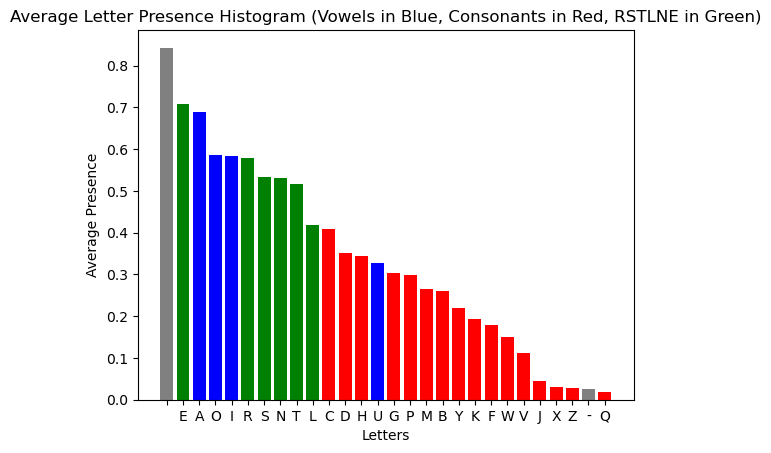

In [34]:
plt.bar(letters, counts/3252, color=colors)

# Label the axes and set a title
plt.xlabel('Letters')
plt.ylabel('Average Presence')
plt.title('Average Letter Presence Histogram (Vowels in Blue, Consonants in Red, RSTLNE in Green)')

plt.savefig('assets/letter_presence_histogram.png', bbox_inches='tight')
# Show the plot
plt.show()

Given a set of letters and excluding another set of letters, how do the probabilities change?

In [35]:
included_set = {"R", "S", "N"}
excluded_set = {"L", "T", "E"}

include_exclude_df = df[
    (df["Letters_Present"].apply(lambda x: included_set.issubset(x))) &
    (~ df["Letters_Present"].apply(lambda x: excluded_set.intersection(x)).astype(bool))
]
include_exclude_df.head()

,Unnamed: 0,Category,Answer,Letter_Count,Letters_Present
50,50,People,AQUARIANS,"{'A': 3, 'Q': 1, 'U': 1, 'R': 1, 'I': 1, 'N': ...","{I, Q, U, N, S, A, R}"
104,104,Living Thing,BARKING DOGS,"{'B': 1, 'A': 1, 'R': 1, 'K': 1, 'I': 1, 'N': ...","{O, I, B, K, , D, N, S, A, G, R}"
264,264,Living Things,CHIRPING BIRDS,"{'C': 1, 'H': 1, 'I': 3, 'R': 2, 'P': 1, 'N': ...","{I, C, B, P, , H, N, D, S, G, R}"
271,271,Proper Name,CHUCK NORRIS,"{'C': 2, 'H': 1, 'U': 1, 'K': 1, ' ': 1, 'N': ...","{O, I, C, U, K, , H, N, S, R}"
384,384,Thing,DRY SKIN,"{'D': 1, 'R': 1, 'Y': 1, ' ': 1, 'S': 1, 'K': ...","{I, Y, K, , D, N, S, R}"


In [36]:
inc_exc_total_letter_count = {}
for letter_count in include_exclude_df["Letter_Count"]:
    for letter, count in letter_count.items():
        inc_exc_total_letter_count[letter] = inc_exc_total_letter_count.get(letter, 0) + count

inc_exc_total_letter_df = pd.DataFrame(inc_exc_total_letter_count.items(), columns=['Letter', 'Total_Count'])
inc_exc_total_letter_df = inc_exc_total_letter_df.sort_values('Total_Count', ascending=False)
inc_exc_total_letter_df

,Letter,Total_Count
5,N,35
0,A,34
3,R,34
6,S,33
10,,32
12,O,28
4,I,23
13,C,19
9,G,15
7,B,13


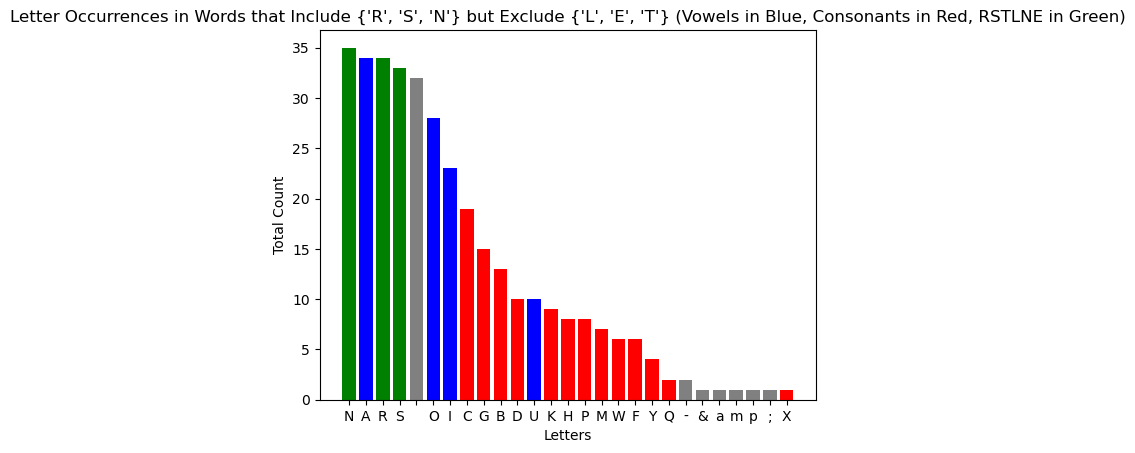

In [37]:
letters = inc_exc_total_letter_df['Letter'][:28]
counts = inc_exc_total_letter_df['Total_Count'][:28]

# Create a list of colors based on the letters
colors = [set_color(letter) for letter in letters]

# Create a bar plot (histogram) with different colors for vowels and consonants
plt.bar(letters, counts, color=colors)

# Label the axes and set a title
plt.xlabel('Letters')
plt.ylabel('Total Count')
plt.title(f'Letter Occurrences in Words that Include {included_set} but Exclude {excluded_set} '
          f'(Vowels in Blue, Consonants in Red, RSTLNE in Green)')

# Show the plot
plt.show()

# TF-IDF

TF-IDF is a way to find the most important letter in a answer, taking into account both the frequency of the letter in the answer and the commonality of the letter. 

Although TF-TDF is typically used in words and documents, we can still use can use same formula for letters. That is, 
$$
\begin{align*}
	\text{tfidf}(t, d) &= \text{tf}(t,d) \cdot \text{idf}(t)\\
	&= \frac{\text{\# of occurences of }t\text{ in }d}{\text{total \# of words in } d} \cdot \log\left( \frac{\text{total \# of documents}}{\text{\# of documents in which }t\text{ appears}} \right)
\end{align*}
$$

In [38]:
letter_counts = df['Letter_Count'].apply(pd.Series).fillna(0)
letter_counts = letter_counts.reindex(sorted(letter_counts.columns), axis=1)
letter_counts.loc[:, 'A':'E'].head()

,A,B,C,D,E
0,1.0,0.0,0.0,1.0,1.0
1,2.0,0.0,1.0,0.0,1.0
2,2.0,1.0,0.0,0.0,1.0
3,2.0,0.0,0.0,1.0,1.0
4,1.0,0.0,0.0,0.0,1.0


In [39]:
letter_presence = (letter_counts > 0).sum().rename("Presence")
letter_presence.loc['A':'E']

A    2242
B     844
C    1331
D    1139
E    2299
Name: Presence, dtype: int64

In [40]:
total_answers = df.shape[0]
idf = np.log(total_answers / letter_presence).rename("idf")
pd.concat([letter_presence, idf], axis=1).loc['A':'Z']

,Presence,idf
A,2242,0.371902
B,844,1.348873
C,1331,0.893340
D,1139,1.049120
E,2299,0.346796
F,583,1.718838
G,988,1.191343
H,1116,1.069519
I,1897,0.538997
J,145,3.110292


In [41]:
tf = letter_counts.div(letter_counts.sum(axis=1), axis=0)
tf.head()

,,!,"""",&,',-,.,2,;,?,...,Z,`,a,e,g,i,m,n,p,s
0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.176471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
tf_idf = tf * idf
tf_idf

,,!,"""",&,',-,.,2,;,?,...,Z,`,a,e,g,i,m,n,p,s
0,0.017131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.028552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.031148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.024473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.030232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,0.017131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3248,0.012237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3249,0.015574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3250,0.014276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
tf_idf.idxmax(axis=1).rename('highest tfidf')

0       W
1       H
2       Y
3       K
4       H
       ..
3247    G
3248    P
3249    G
3250    V
3251    B
Name: highest tfidf, Length: 3252, dtype: object

In [58]:
top1 = pd.concat([df['Answer'], tf_idf.idxmax(axis=1).rename('highest tfidf')], axis=1)
top1

,Answer,highest tfidf
0,GALE WINDS,W
1,A CHEAP SHOT,H
2,A GREAT BUY,Y
3,A KODAK MOMENT,K
4,A LONG HOT SHOWER,H
...,...,...
3247,GREAT DANE,G
3248,SURPRISE PARTY,P
3249,GARAGE SALE,G
3250,TOASTER OVEN,V


This dataframe shows the letter with the highest tf-idf for a given word. In other words, it is the most important letter in the word. 
Let's look at the example 'A GREAT BUY', which looks like `_ _RE_T ___` with 'RSTLNE', and fill in one letter at a time:
- `A _REAT ___`
- `_ GRE_T ___`
- `_ _RE_T B__`
- `_ _RE_T _U_`
- `_ _RE_T __Y`  

Although 'A' fills in the most letters, it doesn't really add that much information to the answer. Afterall, the first 'A' is the only one-letter word in English and the second word can only take so many possibilities. The third word is the hardest to crack, with 'B' or 'Y' giving the most information (thus the most important), hence why they are the two letter with the highest tf-idf in 'A GREAT BUY'. 

In [45]:
top1_counts = top1.value_counts('highest tfidf')
top1_counts

highest tfidf
F    267
V    258
W    253
B    211
K    194
M    189
P    188
G    165
L    148
C    141
D    119
Y    116
J    116
H     98
U     92
Z     90
X     86
T     83
-     67
N     63
S     59
Q     57
'     45
R     34
&     30
O     30
I     17
!      9
A      8
.      8
E      3
?      3
"      1
2      1
`      1
n      1
s      1
Name: count, dtype: int64

This series shows the result of counting all the most important letters for every word in the dataframe. Surprisingly, 'F', 'V', and 'W' are the most common important letter.

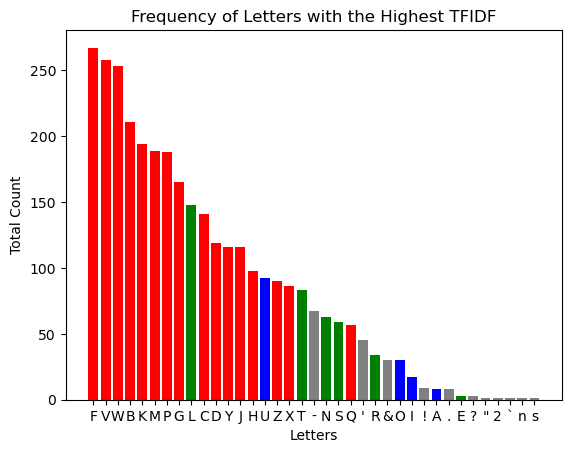

In [84]:
letters = top1_counts.index
colors = [set_color(letter) for letter in letters]

plt.bar(top1_counts.index, top1_counts.values, color=colors)
plt.xlabel('Letters')
plt.ylabel('Total Count')
plt.title('Frequency of Letters with the Highest TFIDF')

plt.savefig('assets/top1_tfidf.png', bbox_inches='tight')
plt.show()

This the bar chart of the above series, showing some interesting results. It looks like the more common a letter is, the less important it becomes. For example, in our prior occurrences and presence analysis, we saw that 'C', 'D', and 'H' were the most common non-RSTLNE letters, but here, they are more or less average. 'L' is the most important 'RSTLNE' letter while being the most uncommon one too. 'U' is also a rather uncommon vowel, but it is the most defining one here as well. 

In [47]:
tfidf_and_frequency = pd.concat([top1_counts, pd.Series(total_letter_count, name='letter_frequency')], axis=1).fillna(0).rename(
    {'count': 'tf-idf_frequency'}, axis=1)
tfidf_and_frequency

,tf-idf_frequency,letter_frequency
F,267.0,738
V,258.0,383
W,253.0,526
B,211.0,1003
K,194.0,705
M,189.0,989
P,188.0,1182
G,165.0,1183
L,148.0,1786
C,141.0,1681


In [48]:
def assign_new_category(letter):
    if re.match(r'[^A-Z]', letter):
        return 'Miscellaneous'
    if re.match(r'[RSTLNE]', letter):
        return 'RSTLNE'
    if re.match(r'[AIOU]', letter):
        return 'Vowel'
    return 'Consonant'

mapping = {
    'Miscellaneous': 'gray',
    'RSTLNE': 'green',
    'Vowel': 'blue',
    'Consonant': 'red'
}

categories = [assign_new_category(letter) for letter in tfidf_and_frequency.index.to_numpy()]
tfidf_and_frequency['category'] = categories
tfidf_and_frequency['color'] = tfidf_and_frequency['category'].map(mapping)
tfidf_and_frequency

,tf-idf_frequency,letter_frequency,category,color
F,267.0,738,Consonant,red
V,258.0,383,Consonant,red
W,253.0,526,Consonant,red
B,211.0,1003,Consonant,red
K,194.0,705,Consonant,red
M,189.0,989,Consonant,red
P,188.0,1182,Consonant,red
G,165.0,1183,Consonant,red
L,148.0,1786,RSTLNE,green
C,141.0,1681,Consonant,red


In [49]:
# plt.scatter(data=tfidf_and_frequency, y='tf-idf_frequency', x='letter_frequency', color='color')
# plt.ylabel('Tf-idf')
# plt.xlabel('Letter Frequency')
# plt.title('Tf-idf vs Letter Frequency')
# plt.show()

In [87]:
fig = px.scatter(tfidf_and_frequency, x='letter_frequency', y='tf-idf_frequency', 
           hover_name=tfidf_and_frequency.index, 
           width=1000, height=500, 
           color='category', 
           color_discrete_map= mapping,
           title='Highest tf-idf letters vs Letter Frequency',
           trendline='ols',
           )
fig.write_html('assets/top1_tf-idf_vs_frequency.html', include_plotlyjs='cdn')
fig.show()

Here we generally see a negative correlation between how frequent letter's show up in a puzzle and how important the letter is in determining it. Although, 'F', 'W', and 'V' are the most frequent important letters, they generally have low frequency, only present in less than 25% of puzzles each. On the other hand, the most common consonant, 'C', only appears to be highly important in a relatively low amount of puzzles (141), compared to 'F' (267). This pattern is much more pronounced with vowels, 'E'(3), 'A'(8), 'O'(30), 'I'(17) are all much more common than 'U', but don't even come close to how 'U' defines its puzzles(92).

However, that was on the most important letter, let's see if the top 3 most important letters changes anything.

In [51]:
def n_largest(row, n=3):
    return row.index[row.argsort()][-n:].to_numpy()

top3 = tf_idf.apply(n_largest, axis=1)
top3_counts = top3.explode().value_counts().rename('top3_tfidf_frequency')
top3_counts

B    708
M    697
P    635
Y    594
K    582
F    552
G    541
W    469
L    433
C    428
U    425
T    384
H    377
D    365
N    364
V    355
S    337
R    224
O    222
I    197
J    144
A    124
E     99
X     94
Z     94
-     79
Q     59
'     46
m     34
&     29
p     20
;     14
!      9
.      8
?      3
i      2
n      2
a      2
"      1
e      1
2      1
s      1
`      1
Name: top3_tfidf_frequency, dtype: int64

In [52]:
new_tfidf_and_frequency = pd.concat([tfidf_and_frequency, top3_counts], axis=1).fillna(0)

In [89]:
fig = px.scatter(new_tfidf_and_frequency, x='letter_frequency', y='top3_tfidf_frequency',
           hover_name=new_tfidf_and_frequency.index,
           width=1000, height=500,
           color='category',
           color_discrete_map= mapping,
           title='Top 3 tf-idf vs Letter Frequency',
           trendline='ols',
           )

fig.write_html('assets/top3_tf-idf_vs_frequency.html', include_plotlyjs='cdn')
fig.show()

With the top 3 most important letters counted, 'B', 'M', and 'P' now become the most frequent important letters. They are also more commonly seen in puzzles than the previous 'F', 'W', and 'V'. 

Because of this, 'B', 'M', 'P' and 'U' are probabilistically the most helpful guesses a contestant can give in the final round. For a safer approach, one could do 'C', 'H', 'D', and any other vowel. 

In [81]:
print(tf_idf[df['Answer'] == 'ENERGY EFFICIENT'].T.sort_values(413, ascending=False).iloc[:10].T.round(3).to_markdown())

|     |     F |     Y |     E |     N |     G |     I |     C |     T |     R |       |
|----:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|
| 413 | 0.215 | 0.095 | 0.087 | 0.079 | 0.074 | 0.067 | 0.056 | 0.041 | 0.034 | 0.011 |
